In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import metrics
import csv
from matplotlib.colors import LinearSegmentedColormap
import scipy.stats
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


In [2]:
# load mutants for kde plot

dir_filepath = './logs/Aligning_SFT_ESM2s_wpPPO'

# Load scores from pretrained ESM2 650M
version = 12
fixed_scores_np = np.load(f'{dir_filepath}/version_{version}/fixed_esm2_t33_650M_UR50D_scores.npy')

# Load sft scores
version = 12
sft_scores_np = np.load(f'{dir_filepath}/version_{version}/sft_esm2_t33_650M_UR50D_scores.npy')

# Load rl scores
version = 12
rl_scores_np = np.load(f'{dir_filepath}/version_{version}/ema_aligned_esm2_t33_650M_UR50D_scores.npy')

dpo_dir_filepath = '../DPO_ESM2/logs/DPO_esm2_t33_650M_UR50D_with_DPO_CreiLOV_DMS_dataset_w_ESM2_log_likelihood'

# DPO scores (Hie et al)
version = 10
dpo_hie = np.load(f'{dpo_dir_filepath}/version_{version}/non_EMA_rl_scores_HCthreshold_HC0.9_CP0.25_5.npy')
dpo_hie_max_sampling = np.load(f'{dpo_dir_filepath}/version_{version}/non_EMA_rl_scores_max_sampling_5.npy')

# DPO (Ferruz et al)
version = 12
dpo_ferruz = np.load(f'{dpo_dir_filepath}/version_{version}/non_EMA_rl_scores_HCthreshold_HC0.9_CP0.25_5.npy')
dpo_ferruz_max_sampling = np.load(f'{dpo_dir_filepath}/version_{version}/non_EMA_rl_scores_max_sampling_5.npy')

# DPO from SFT scores (Ferruz et al)
version = 14
dpo_ferruz_new_lr = np.load(f'{dpo_dir_filepath}/version_{version}/non_EMA_rl_scores_HCthreshold_HC0.9_CP0.25_5.npy')
dpo_ferruz_new_lr_max_sampling = np.load(f'{dpo_dir_filepath}/version_{version}/non_EMA_rl_scores_max_sampling_5.npy')

# DPO scores from SFT scores (Hie et al)
version = 11
dpo_hie_from_sft = np.load(f'{dpo_dir_filepath}/version_{version}/non_EMA_rl_scores_HCthreshold_HC0.9_CP0.25_5.npy')
dpo_hie_from_sft_max_sampling = np.load(f'{dpo_dir_filepath}/version_{version}/non_EMA_rl_scores_max_sampling_5.npy')

# DPO from SFT scores (Ferruz et al)
version = 13
dpo_ferruz_from_sft = np.load(f'{dpo_dir_filepath}/version_{version}/non_EMA_rl_scores_HCthreshold_HC0.9_CP0.25_5.npy')
dpo_ferruz_from_sft_max_sampling = np.load(f'{dpo_dir_filepath}/version_{version}/non_EMA_rl_scores_max_sampling_5.npy')




In [3]:
# Constants for the mean and standard deviation
predicted_log_mean_wt_score = 4.1498 # this is predicted WT score # mean log exp score: 4.094413241


In [4]:
alpha = 0.5

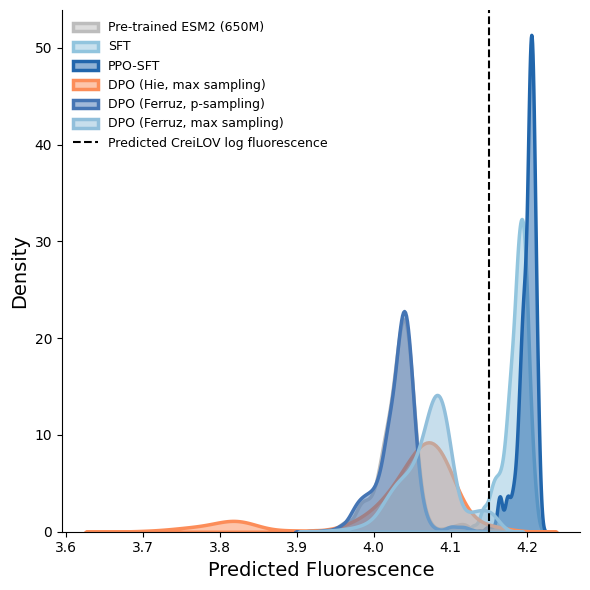

In [7]:
# Plot histogram
fig, ax = plt.subplots(figsize=(6, 6))

# Pretrained, SFT, PPO
sns.kdeplot(np.median(fixed_scores_np, axis=0), color='#bdbdbd', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Pre-trained ESM2 (650M)')
sns.kdeplot(np.median(sft_scores_np, axis=0), color='#92c5de', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='SFT')
sns.kdeplot(np.median(rl_scores_np, axis=0), color='#2166ac', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='PPO-SFT')

# DPO Hie (original)
sns.kdeplot(np.median(dpo_hie, axis=0), color='#d73027', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='DPO (Hie, p-sampling)', warn_singular=False)
sns.kdeplot(np.median(dpo_hie_max_sampling, axis=0), color='#fc8d59', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='DPO (Hie, max sampling)', warn_singular=False)

# # DPO Hie from SFT
# sns.kdeplot(np.median(dpo_hie_from_sft, axis=0), color='#e34a33', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='DPO-SFT (Hie)')
# sns.kdeplot(np.median(dpo_hie_from_sft_max_sampling, axis=0), color='#fdbb84', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='DPO-SFT (Hie, max sampling)')

# DPO Ferruz (original)
sns.kdeplot(np.median(dpo_ferruz, axis=0), color='#4575b4', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='DPO (Ferruz, p-sampling)', warn_singular=False)
sns.kdeplot(np.median(dpo_ferruz_max_sampling, axis=0), color='#91bfdb', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='DPO (Ferruz, max sampling)', warn_singular=False)

# # DPO Ferruz from SFT
# sns.kdeplot(np.median(dpo_ferruz_from_sft, axis=0), color='#313695', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='DPO-SFT (Ferruz)')
# sns.kdeplot(np.median(dpo_ferruz_from_sft_max_sampling, axis=0), color='#74add1', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='DPO-SFT (Ferruz, max sampling)')

# # DPO Ferruz with new learning rate
# sns.kdeplot(np.median(dpo_ferruz_new_lr, axis=0), color='#1a9850', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='DPO (Ferruz, new lr, p-sampling)', warn_singular=False)
# sns.kdeplot(np.median(dpo_ferruz_new_lr_max_sampling, axis=0), color='#66bd63', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='DPO (Ferruz, new lr, max sampling)', warn_singular=False)

# Reference line
ax.axvline(predicted_log_mean_wt_score, color='black', linestyle='--', linewidth=1.5, label='Predicted CreiLOV log fluorescence')

# Aesthetics
ax.set_xlabel('Predicted Fluorescence', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=9, frameon=False, loc='upper left', ncol=1)
plt.tight_layout()

# Save the plot
plt.savefig(f'./figures/ppo_dpo_esm2_design_scores.svg')
plt.savefig(f'./figures/ppo_dpo_esm2_design_scores.png')


In [11]:
# Constants
alpha = 1
predicted_wt_score = 4.1498  # predicted WT score
WT_linewidth = 2
linewidth = 1
fill = False
n = 50
n_win_rate = 250

# Define the order and colors for each model (matching your KDEplot labels)
new_order = [
    'Pre-trained ESM-2 (650M)',
    'SFT',
    'PPO-SFT',
    
    'DPO (Hie, p-sampling)',
    'DPO (Ferruz, p-sampling)',
    # 'DPO (Ferruz, new lr, p-sampling)',
    'DPO (Hie, max sampling)',
    'DPO (Ferruz, max sampling)',
    # 'DPO (Ferruz, new lr, max sampling)',
    
    # 'DPO-SFT (Hie, p-sampling)',
    # 'DPO-SFT (Ferruz, p-sampling)',
    # 'DPO-SFT (Hie, max sampling)',
    # 'DPO-SFT (Ferruz, max sampling)',
]

color_map = {
    'Pre-trained ESM-2 (650M)': '#bdbdbd',
    'SFT': '#92c5de',
    'PPO-SFT': '#2166ac',
    
    'DPO (Hie, p-sampling)': '#d73027',
    'DPO (Ferruz, p-sampling)': '#fc8d59',
    # 'DPO (Ferruz, new lr, p-sampling)': '#e34a33',
    'DPO (Hie, max sampling)': '#fdbb84',
    'DPO (Ferruz, max sampling)': '#4575b4',
    # 'DPO (Ferruz, new lr, max sampling)': '#91bfdb',
    
    # 'DPO-SFT (Hie, p-sampling)': '#313695',
    # 'DPO-SFT (Ferruz, p-sampling)': '#74add1',
    # 'DPO-SFT (Hie, max sampling)': '#1a9850',
    # 'DPO-SFT (Ferruz, max sampling)': '#66bd63'
}

# For each model, compute the median scores (over axis=0) and sample (up to) 100 points.
data_to_plot = [
    np.median(fixed_scores_np, axis=0)[:n],
    np.median(sft_scores_np, axis=0)[:n],
    np.median(rl_scores_np, axis=0)[:n],
    
    np.median(dpo_hie, axis=0)[:n],
    np.median(dpo_ferruz, axis=0)[:n],
    # np.median(dpo_ferruz_new_lr, axis=0)[:n],
    np.median(dpo_hie_max_sampling, axis=0)[:n],
    np.median(dpo_ferruz_max_sampling, axis=0)[:n],
    # np.median(dpo_ferruz_new_lr_max_sampling, axis=0)[:n],

    # np.median(dpo_hie_from_sft, axis=0)[:n],
    # np.median(dpo_ferruz_from_sft, axis=0)[:n],
    # np.median(dpo_hie_from_sft_max_sampling, axis=0)[:n],
    # np.median(dpo_ferruz_from_sft_max_sampling, axis=0)[:n],
    
]

win_rate_sample = {
    'Pre-trained ESM-2 (650M)': np.median(fixed_scores_np, axis=0)[:n_win_rate],
    'SFT': np.median(sft_scores_np, axis=0)[:n_win_rate],
    'PPO-SFT': np.median(rl_scores_np, axis=0)[:n_win_rate],
    
    'DPO (Hie, p-sampling)': np.median(dpo_hie, axis=0)[:n_win_rate],
    'DPO (Ferruz, p-sampling)': np.median(dpo_ferruz, axis=0)[:n_win_rate],
    # 'DPO (Ferruz, new lr, p-sampling)': np.median(dpo_ferruz_new_lr, axis=0)[:n_win_rate],
    'DPO (Hie, max sampling)': np.median(dpo_hie_max_sampling, axis=0)[:n_win_rate],
    'DPO (Ferruz, max sampling)': np.median(dpo_ferruz_max_sampling, axis=0)[:n_win_rate],
    # 'DPO (Ferruz, new lr, max sampling)': np.median(dpo_ferruz_new_lr_max_sampling, axis=0)[:n_win_rate],
    
    # 'DPO-SFT (Hie, p-sampling)': np.median(dpo_hie_from_sft, axis=0)[:n_win_rate],
    # 'DPO-SFT (Ferruz, p-sampling)': np.median(dpo_ferruz_from_sft, axis=0)[:n_win_rate],
    # 'DPO-SFT (Hie, max sampling)': np.median(dpo_hie_from_sft_max_sampling, axis=0)[:n_win_rate],
    # 'DPO-SFT (Ferruz, max sampling)': np.median(dpo_ferruz_from_sft_max_sampling, axis=0)[:n_win_rate],
    
}

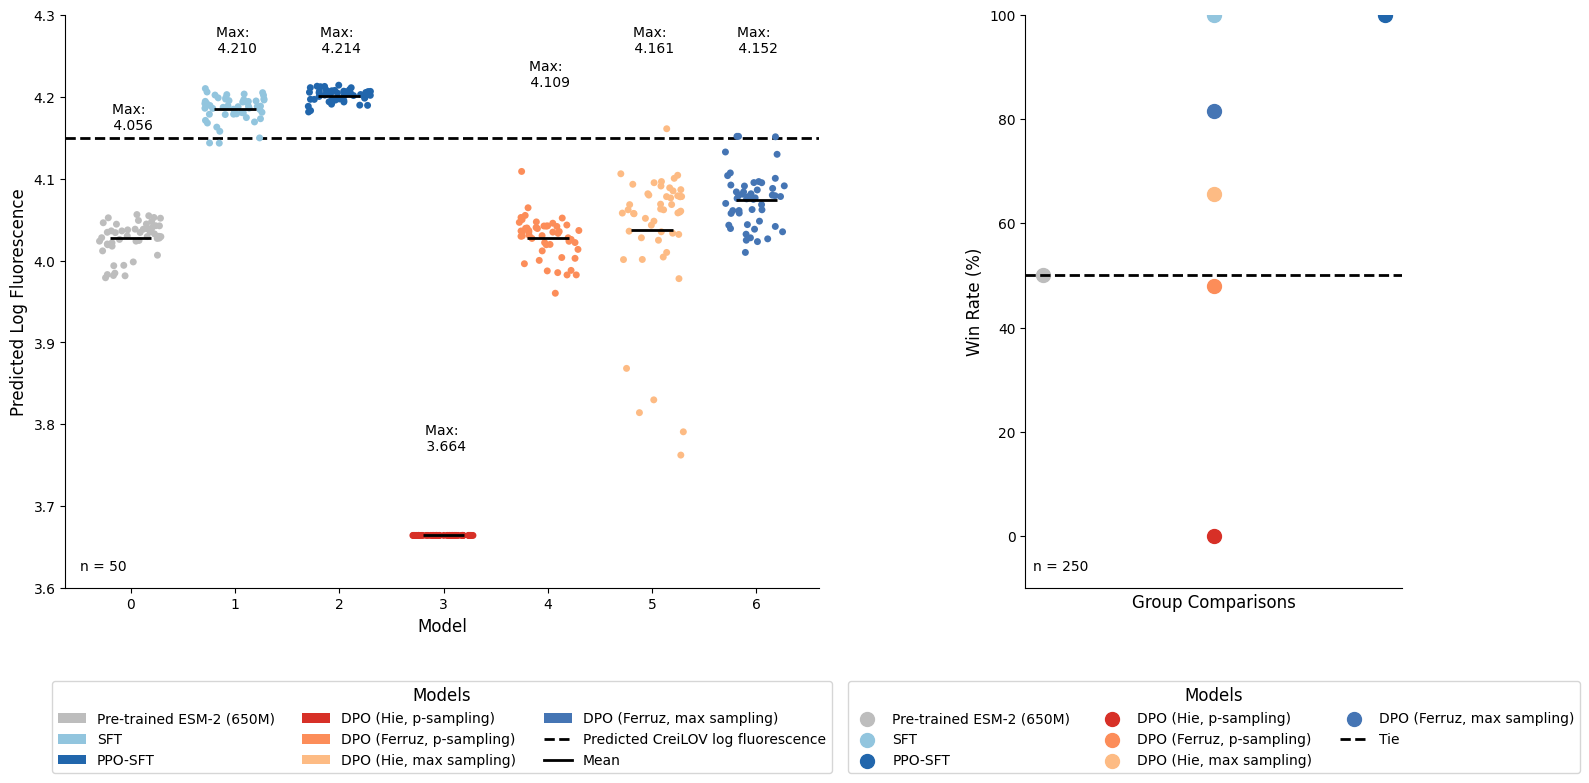

In [12]:
# ---------------------------
# Create the figure and subplots
# ---------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [2, 1]})

# ===================================================
# Subplot 1: Stripplot of Predicted Fluorescence Scores
# ===================================================

# Plot the stripplot with jitter (each “group” is one model)
sns.stripplot(
    data=data_to_plot,
    ax=ax1,
    palette=[color_map[m] for m in new_order],
    jitter=0.3
)

# Add a horizontal mean line for each model
for i, scores in enumerate(data_to_plot):
    mean_val = np.mean(scores)
    ax1.hlines(mean_val, i - 0.2, i + 0.2, colors='black', linestyles='-', lw=WT_linewidth, zorder=10)

# Draw a horizontal dashed line for the predicted wild-type score
ax1.axhline(predicted_log_mean_wt_score, color='black', linestyle='--', linewidth=WT_linewidth,
            label='Predicted CreiLOV log fluorescence')

# Set axis labels and limits (adjust as appropriate for your data)
ax1.set_ylabel('Predicted Log Fluorescence', fontsize=12)
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylim(3.6, 4.3)

# Set x-tick positions and labels
ax1.set_xticks(np.arange(len(new_order)))

# Annotate each group with its maximum value
for i, scores in enumerate(data_to_plot):
    max_val = np.max(scores)
    y_offset = 0.1
    
    # Ensure the text stays within the y-limit
    y_pos = min(max_val + y_offset, ax1.get_ylim()[1] - 0.05)
    ax1.text(i, y_pos, f"Max: \n {max_val:.3f}", ha='center', va='bottom', fontsize=10, color='black')

ax1.text(0.02, 0.05, f"n = {n}", transform=ax1.transAxes, fontsize=10, color='black', va='top')

# Create legend handles for each model plus the predicted score and mean markers
model_handles = [Patch(facecolor=color_map[m], label=m) for m in new_order]
wt_line_handle = Line2D([0], [0], color='black', linestyle='--', linewidth=WT_linewidth,
                          label='Predicted CreiLOV log fluorescence')
mean_line_handle = Line2D([0], [0], color='black', linestyle='-', linewidth=WT_linewidth, label='Mean')
ax1.legend(handles=model_handles + [wt_line_handle, mean_line_handle],
           title="Models", loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=3, fontsize=10, title_fontsize=12)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# ===================================================
# Subplot 2: Win Rate by Model (Relative to SFT)
# ===================================================

# Define x-positions that mimic the positions in the original subplot.
# In the groups, the baseline always appears at x=0 and the other models are at x=1 or x=2.
model_x_positions = {
    'Pre-trained ESM-2 (650M)': 0,
    'SFT': 1,
    'PPO-SFT': 2,
    
    'DPO (Hie, p-sampling)': 1,
    'DPO (Ferruz, p-sampling)': 1,
    # 'DPO (Ferruz, new lr, p-sampling)': 1,
    'DPO (Hie, max sampling)': 1,
    'DPO (Ferruz, max sampling)': 1,
    # 'DPO (Ferruz, new lr, max sampling)': 1,
    
    # 'DPO-SFT (Hie, p-sampling)': 2,
    # 'DPO-SFT (Ferruz, p-sampling)': 2,
    # 'DPO-SFT (Hie, max sampling)': 2,
    # 'DPO-SFT (Ferruz, max sampling)': 2,
}

baseline_key = "Pre-trained ESM-2 (650M)"  # Baseline model for win rate comparisons

# Plot one dot per model type.
for model, color in color_map.items():
    # Compute win rate relative to baseline:
    # If the model is the baseline, its win rate is defined to be 50%.
    if model == baseline_key:
        wr = 50
    else:
        wr = np.mean(win_rate_sample[model] > win_rate_sample[baseline_key]) * 100
    
    x = model_x_positions[model]
    ax2.scatter(x, wr, marker='o', s=100, color=color, label=model)

# Optionally add text (e.g. sample size)
ax2.text(0.02, 0.05, f"n = {n_win_rate}", transform=ax2.transAxes, fontsize=10, color='black', va='top')

# Draw the baseline as a black dashed line at 50%
baseline_handle = ax2.axhline(50, color='black', linestyle='--', linewidth=WT_linewidth, label='Tie')

# Since x-axis positions are arbitrary (columns for baseline, second, and third elements), remove the ticks.
ax2.set_xticks([])
ax2.set_xlabel('Group Comparisons', fontsize=12)
ax2.set_ylabel('Win Rate (%)', fontsize=12)
ax2.set_ylim(-10, 100)

# Create a legend (eliminate duplicate labels)
handles, labels = ax2.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys(), title="Models", loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=3, fontsize=10, title_fontsize=12)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# ---------------------------
# Finalize and Save the Figure
# ---------------------------
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('./figures/ppo_dpo_esm2_design_scores.svg')
plt.savefig('./figures/ppo_dpo_esm2_design_scores.png')
plt.show()
